In [1]:
import matplotlib.pyplot as plt
% matplotlib inline
import numpy as np
plt.rcParams['figure.dpi'] = 300

In [2]:
from sklearn.linear_model import Ridge, LinearRegression

In [3]:
from sklearn.model_selection import cross_val_score

In [4]:
from sklearn.datasets import load_boston
boston = load_boston()

In [5]:
from sklearn.utils import shuffle
X, y = boston.data, boston.target
X, y = shuffle(X, y)

In [6]:
X.shape

(506, 13)

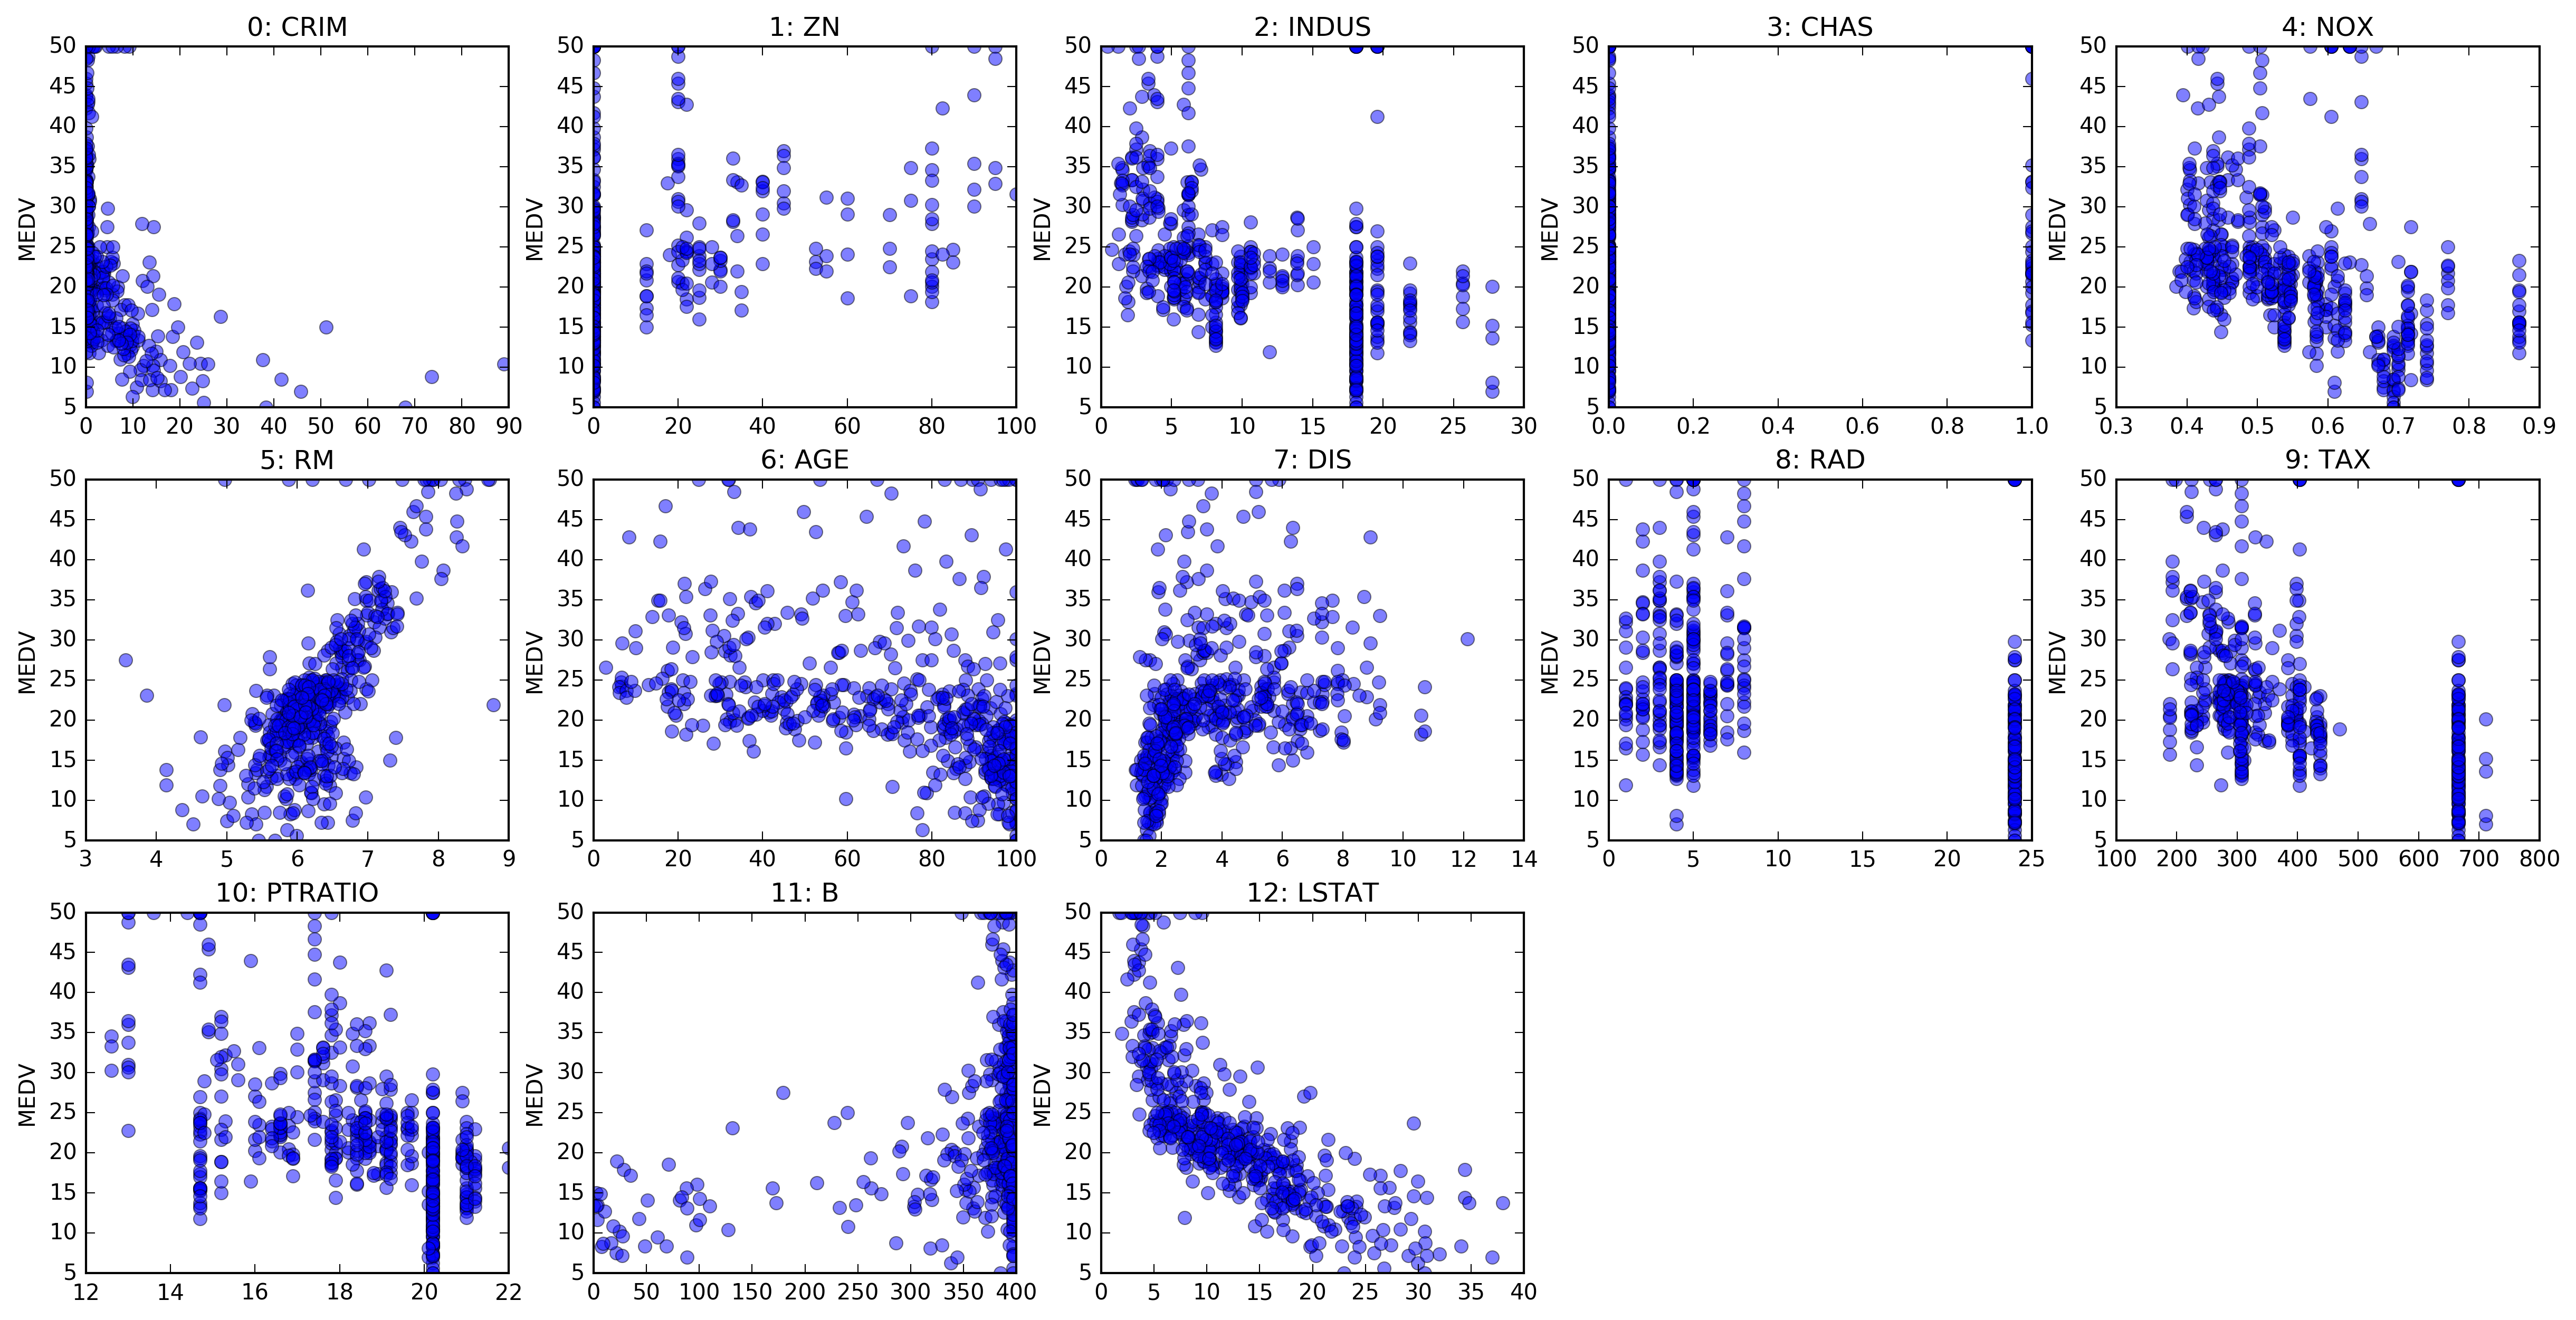

In [7]:
fig, axes = plt.subplots(3, 5, figsize=(20, 10))
for i, ax in enumerate(axes.ravel()):
    if i > 12:
        ax.set_visible(False)
        continue
    ax.plot(X[:, i], y, 'o', alpha=.5)
    ax.set_title("{}: {}".format(i, boston.feature_names[i]))
    ax.set_ylabel("MEDV")

In [8]:
print(X.shape)
print(y.shape)

(506, 13)
(506,)


In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [10]:
np.mean(cross_val_score(LinearRegression(), X_train, y_train, cv=10))

/Users/tnarik/Desktop/odsc_workshops/python/.direnv/python-3.6.0/lib/python3.6/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


0.70946562284118453

In [11]:
np.mean(cross_val_score(Ridge(), X_train, y_train, cv=10))

0.7054249166780191

In [12]:
from sklearn.model_selection import GridSearchCV
param_grid = {'alpha': np.logspace(-3, 3, 14)}
print(param_grid)

{'alpha': array([  1.00000000e-03,   2.89426612e-03,   8.37677640e-03,
         2.42446202e-02,   7.01703829e-02,   2.03091762e-01,
         5.87801607e-01,   1.70125428e+00,   4.92388263e+00,
         1.42510267e+01,   4.12462638e+01,   1.19377664e+02,
         3.45510729e+02,   1.00000000e+03])}


In [13]:
grid = GridSearchCV(Ridge(), param_grid, cv=10)
grid.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'alpha': array([  1.00000e-03,   2.89427e-03,   8.37678e-03,   2.42446e-02,
         7.01704e-02,   2.03092e-01,   5.87802e-01,   1.70125e+00,
         4.92388e+00,   1.42510e+01,   4.12463e+01,   1.19378e+02,
         3.45511e+02,   1.00000e+03])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

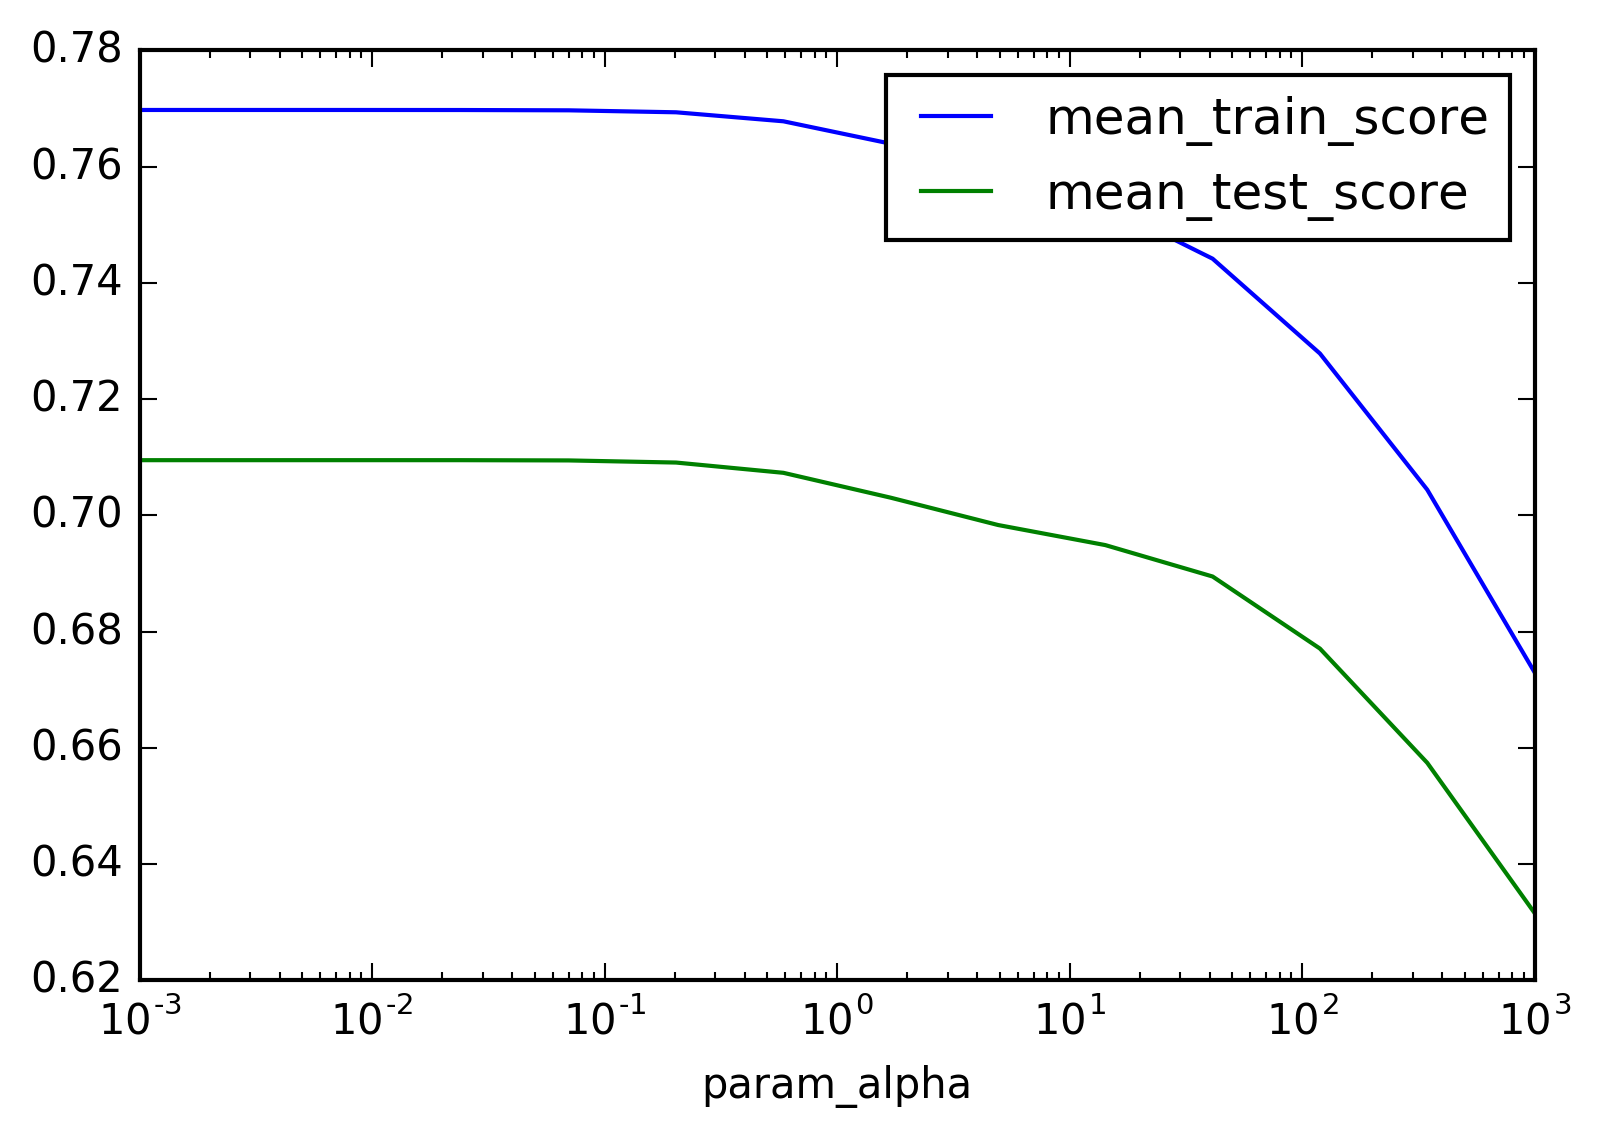

In [14]:
import pandas as pd
results = pd.DataFrame(grid.cv_results_)
results.plot('param_alpha', 'mean_train_score')
results.plot('param_alpha', 'mean_test_score', ax=plt.gca())

plt.legend()
plt.xscale("log")

In [15]:
from sklearn.preprocessing import PolynomialFeatures, scale
X_poly = PolynomialFeatures(include_bias=False).fit_transform(scale(X))
print(X_poly.shape)
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, random_state=42)

(506, 104)


In [16]:
np.mean(cross_val_score(LinearRegression(), X_train, y_train, cv=10))

0.80882444009369081

In [17]:
np.mean(cross_val_score(Ridge(), X_train, y_train, cv=10))

0.85854234658570472

In [18]:
grid = GridSearchCV(Ridge(), param_grid, cv=10)
grid.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'alpha': array([  1.00000e-03,   2.89427e-03,   8.37678e-03,   2.42446e-02,
         7.01704e-02,   2.03092e-01,   5.87802e-01,   1.70125e+00,
         4.92388e+00,   1.42510e+01,   4.12463e+01,   1.19378e+02,
         3.45511e+02,   1.00000e+03])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

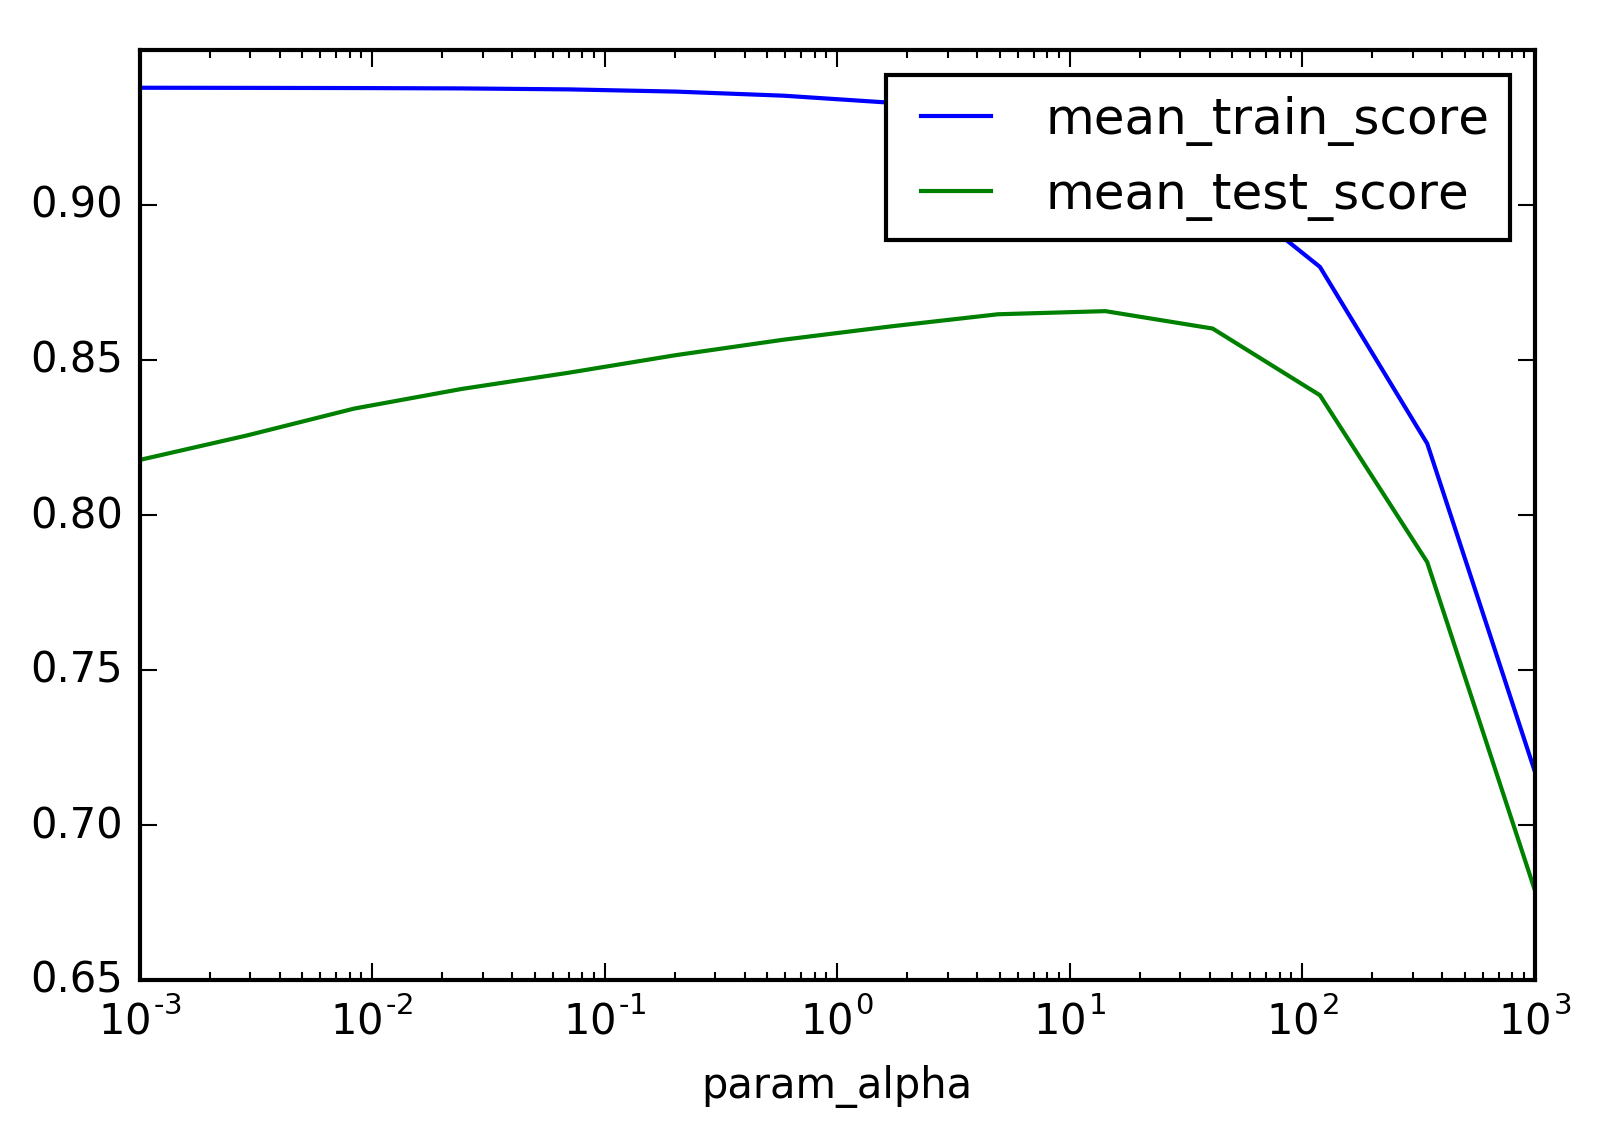

In [19]:
results = pd.DataFrame(grid.cv_results_)
results.plot('param_alpha', 'mean_train_score')
results.plot('param_alpha', 'mean_test_score', ax=plt.gca())
plt.legend()
plt.xscale("log")

In [20]:
print(grid.best_params_)
print(grid.best_score_)

{'alpha': 14.251026703029993}
0.865893476785


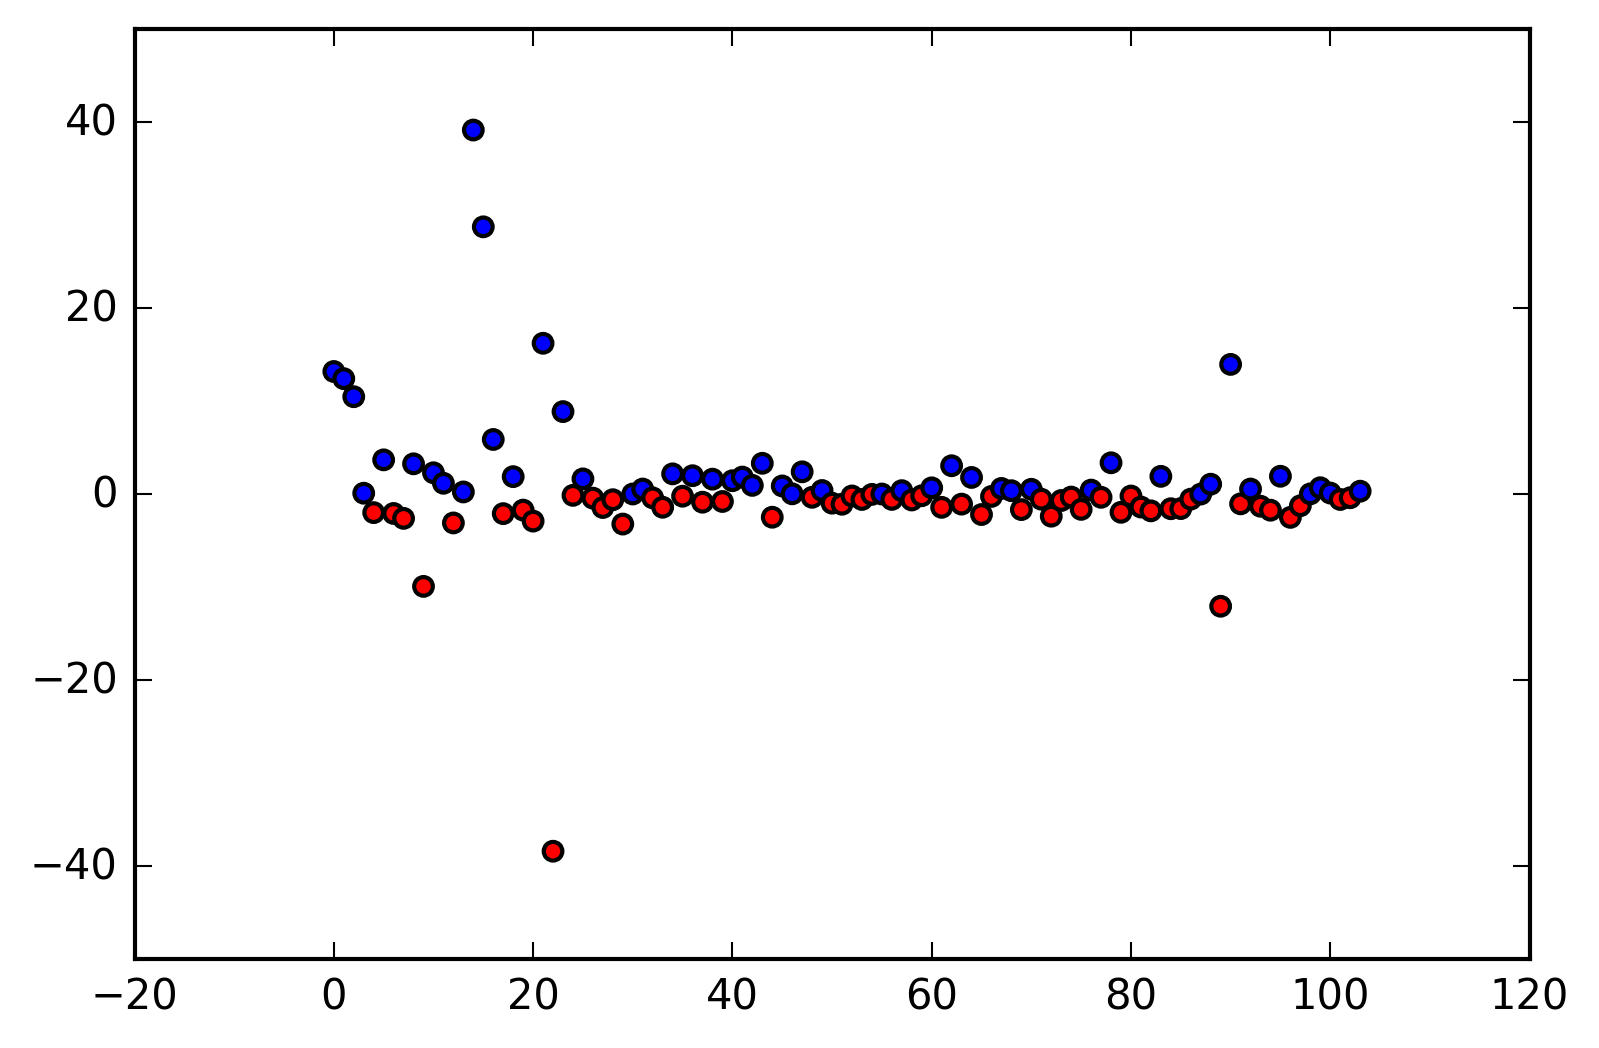

In [21]:
lr = LinearRegression().fit(X_train, y_train)
plt.scatter(range(X_poly.shape[1]), lr.coef_, c=np.sign(lr.coef_), cmap="bwr_r");

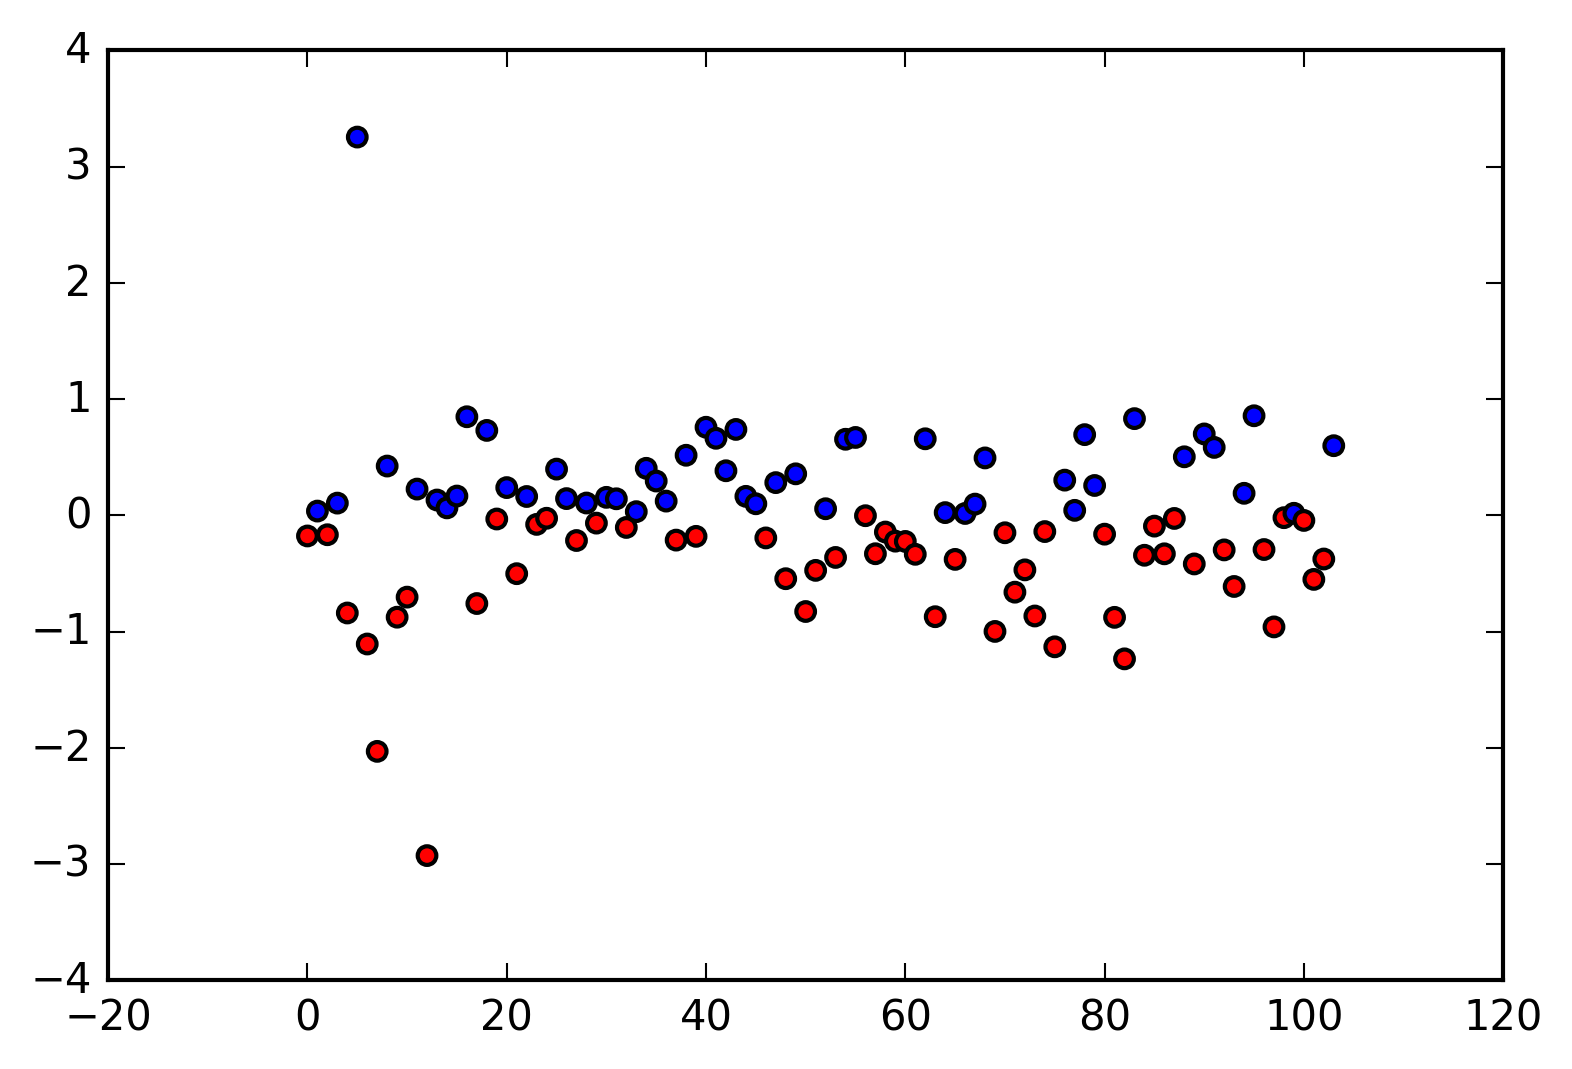

In [22]:
ridge = grid.best_estimator_
plt.scatter(range(X_poly.shape[1]), ridge.coef_, c=np.sign(ridge.coef_), cmap="bwr_r");

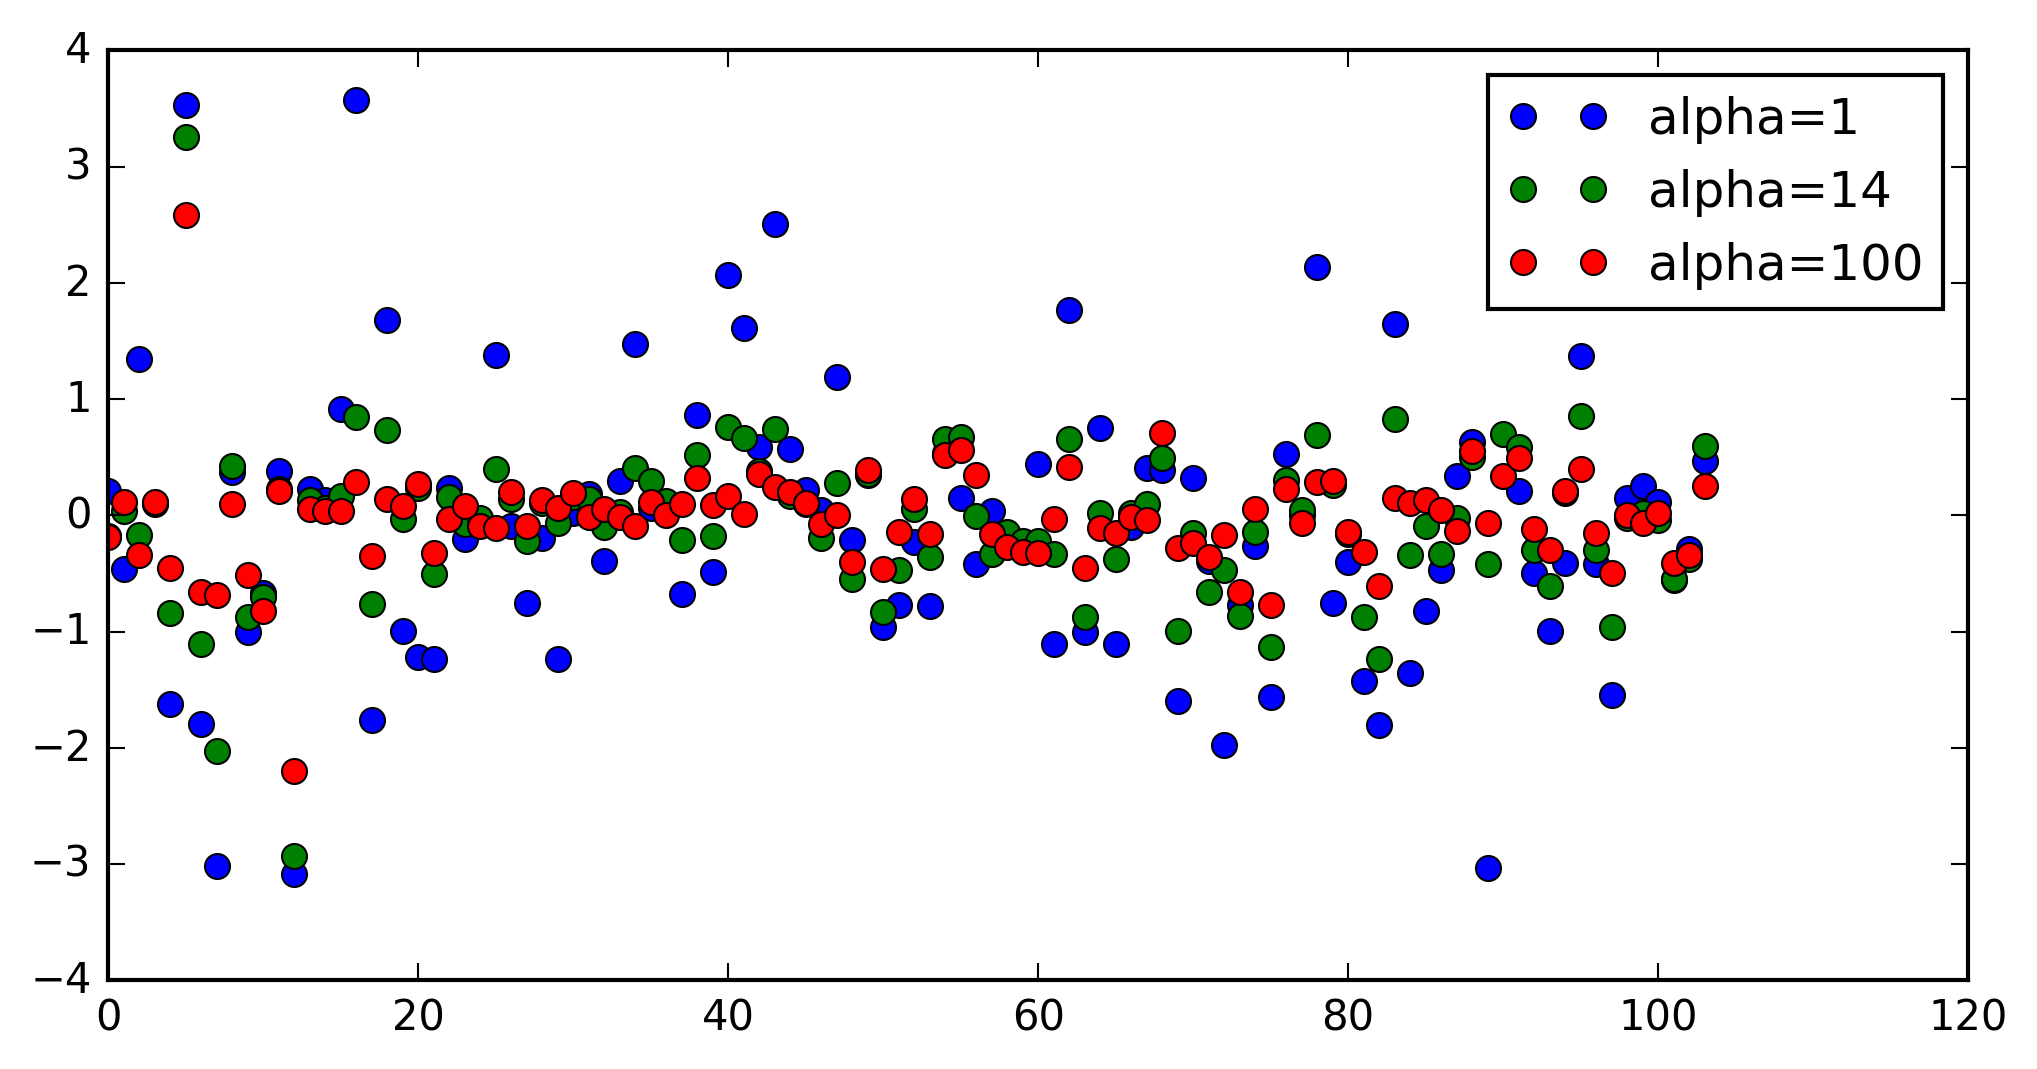

In [23]:
ridge100 = Ridge(alpha=100).fit(X_train, y_train)
ridge1 = Ridge(alpha=1).fit(X_train, y_train)
plt.figure(figsize=(8, 4))

plt.plot(ridge1.coef_, 'o', label="alpha=1")
plt.plot(ridge.coef_, 'o', label="alpha=14")
plt.plot(ridge100.coef_, 'o', label="alpha=100")
plt.legend();

# Exercise
Load the diabetes dataset using ``sklearn.datasets.load_diabetes``. Apply ``LinearRegression`` and ``Ridge`` and visualize the coefficients.

In [24]:
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()
data = diabetes.data
target = diabetes.target

In [25]:
data.shape

(442, 10)

In [26]:
target.shape

(442,)

In [27]:
X_train, X_test, y_train, y_test = train_test_split(data, target)

In [28]:
np.mean(cross_val_score(LinearRegression(), X_train, y_train, cv=10))

0.50947797240105375

In [29]:
np.mean(cross_val_score(Ridge(), X_train, y_train, cv=10))

0.41268976749153935

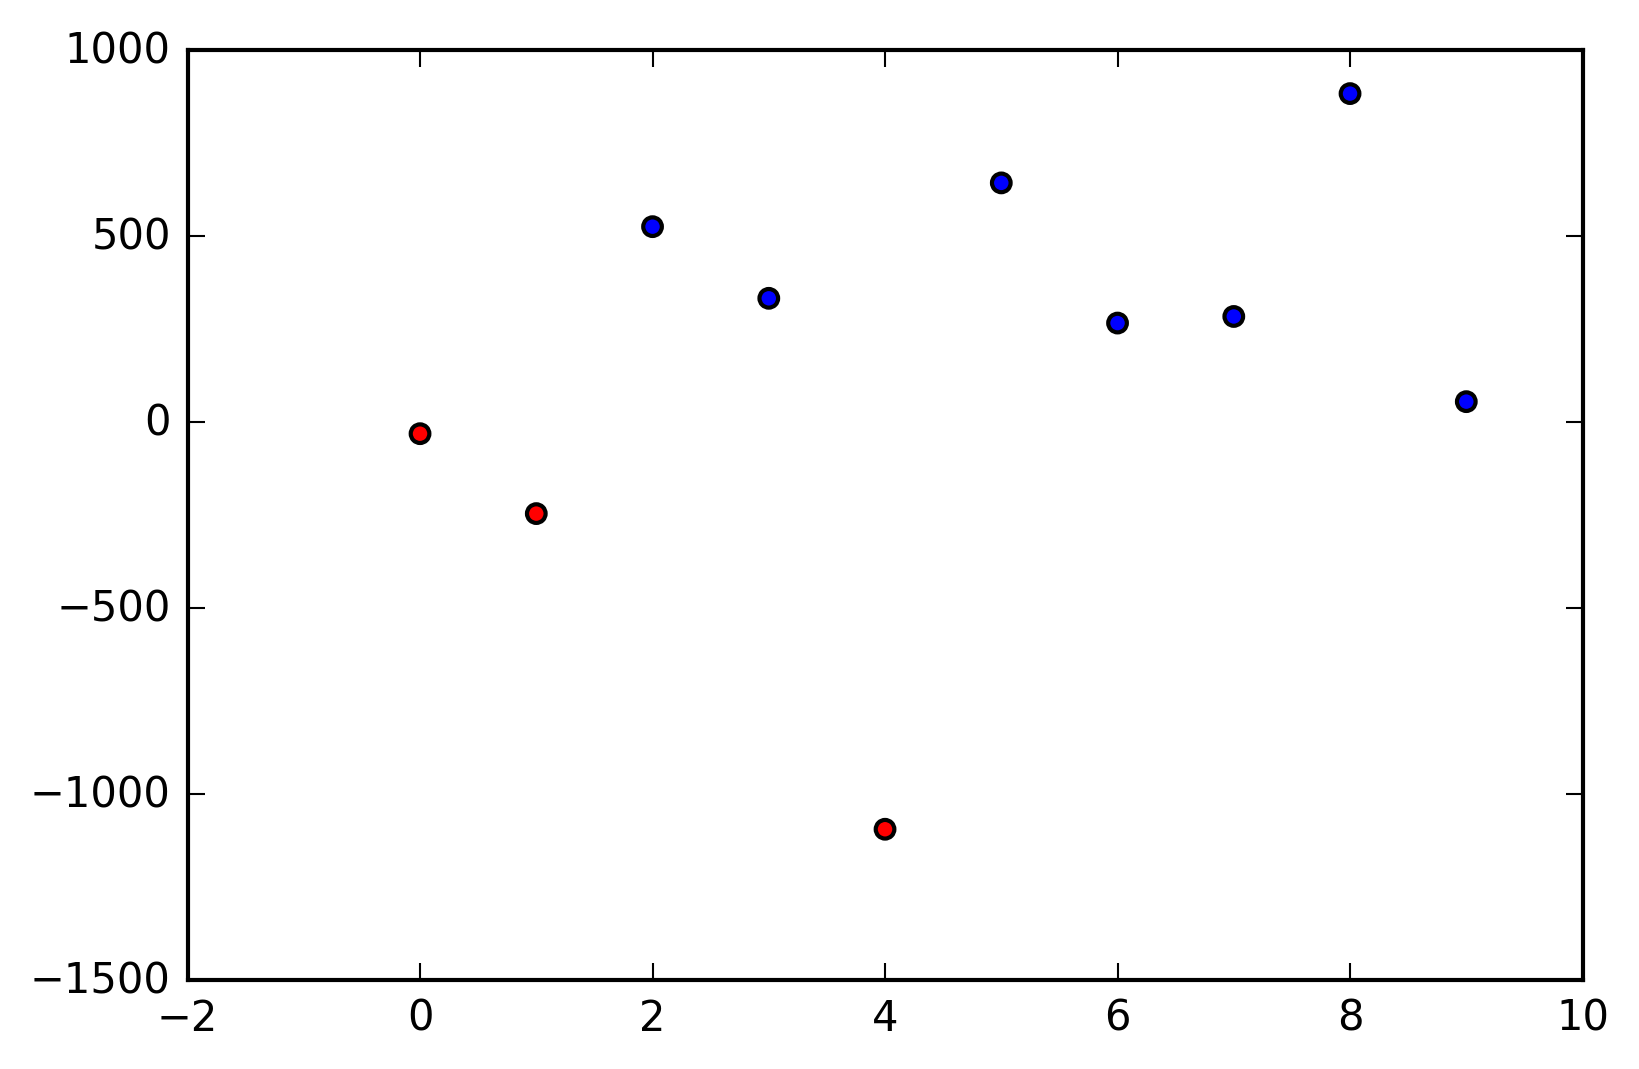

In [30]:
lr = LinearRegression().fit(X_train, y_train)
plt.scatter(range(X_train.shape[1]), lr.coef_, c=np.sign(lr.coef_), cmap="bwr_r");

In [31]:
X_poly = PolynomialFeatures(include_bias=False).fit_transform(scale(X))
print(X_poly.shape)
X_poly_train, X_poly_test, y_poly_train, y_poly_test = train_test_split(X_poly, y)

(506, 104)


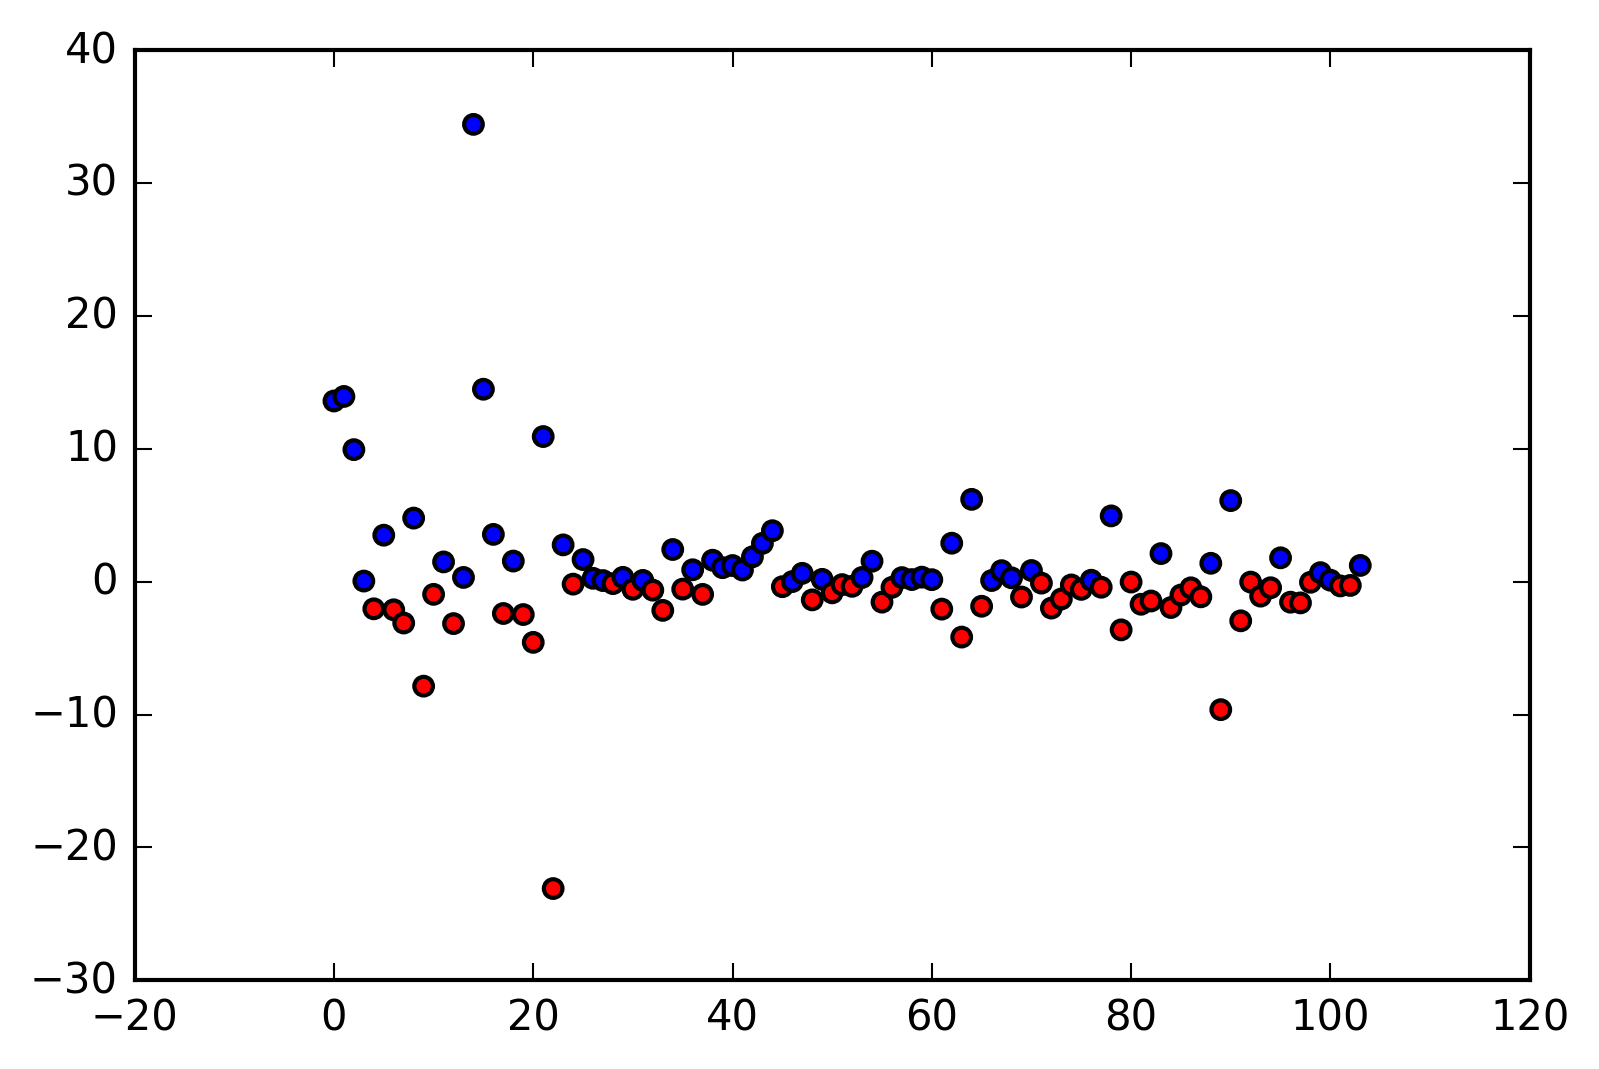

In [33]:
lr = LinearRegression().fit(X_poly_train, y_poly_train)
plt.scatter(range(X_poly_train.shape[1]), lr.coef_, c=np.sign(lr.coef_), cmap="bwr_r");

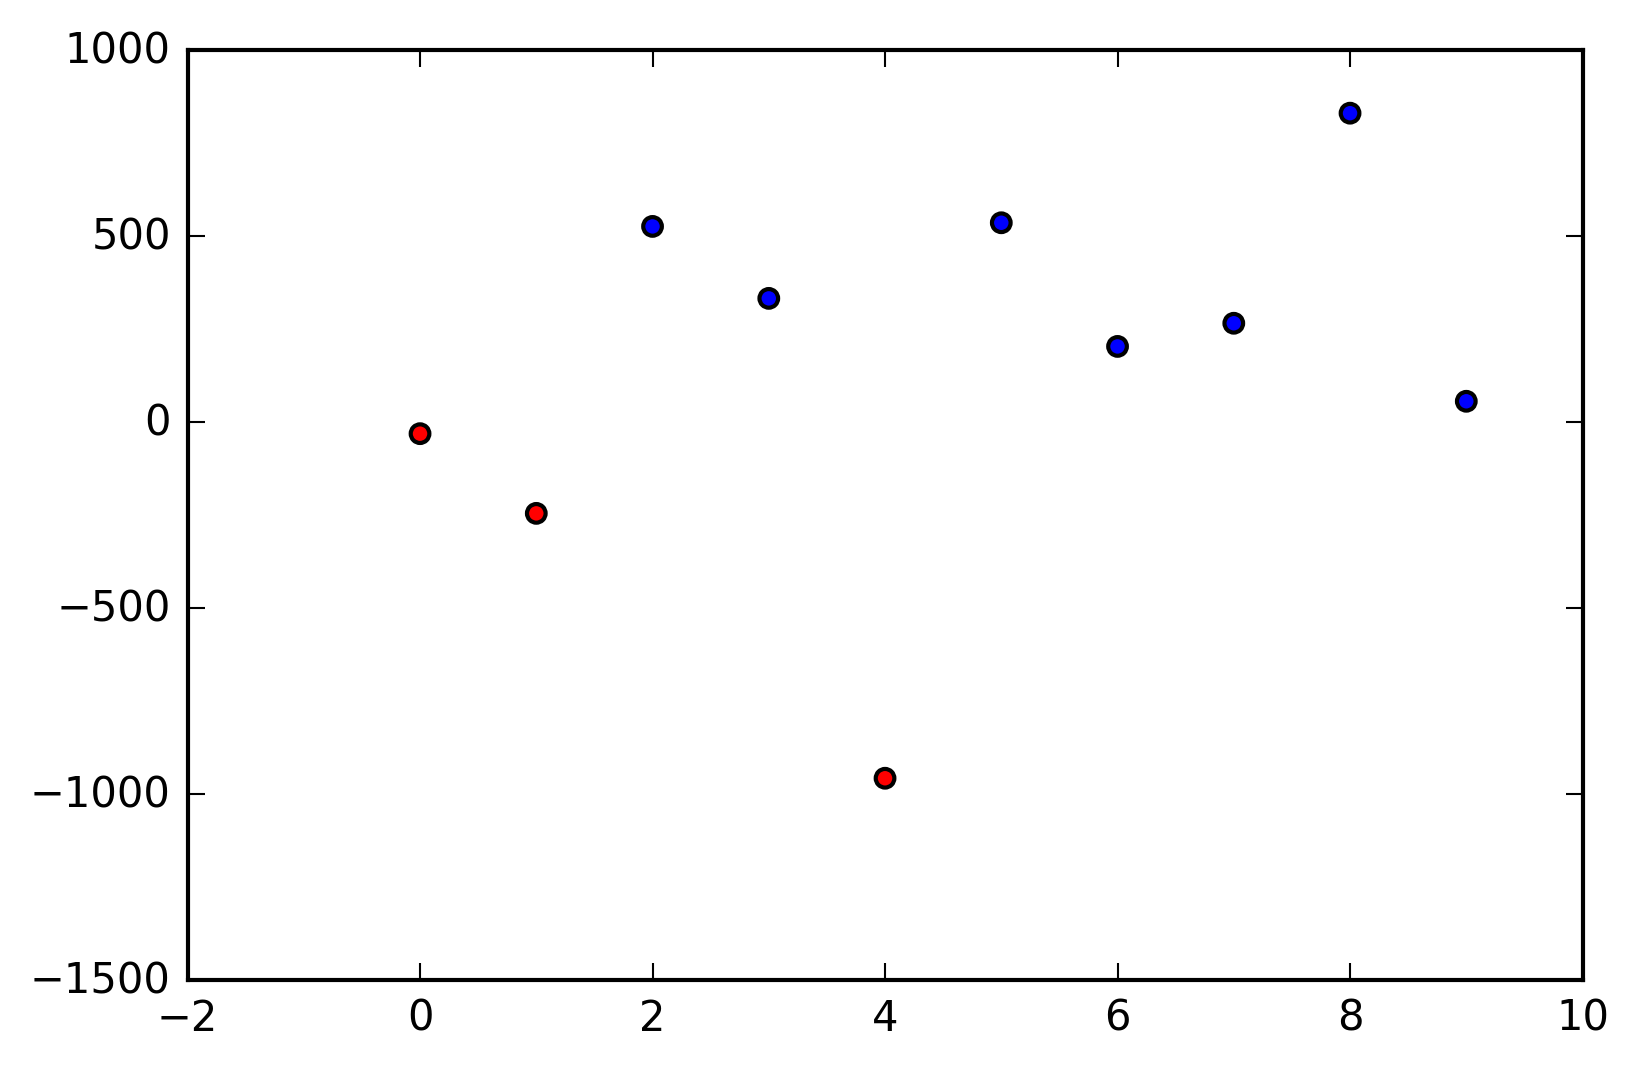

In [35]:
param_grid = {'alpha': np.logspace(-3, 3, 14)}
grid = GridSearchCV(Ridge(), param_grid, cv=10)
grid.fit(X_train, y_train)
plt.scatter(range(X_train.shape[1]), grid.best_estimator_.coef_, c=np.sign(grid.best_estimator_.coef_), cmap="bwr_r");

In [36]:
grid.best_params_

{'alpha': 0.001}